In [1]:
from config_figures import *
from scipy.stats import gaussian_kde
from math import floor, ceil

In [2]:
def get_area_lat_elev_df(drive_filename):
    df = pd.read_csv(google_drive_path + '/' + drive_filename + '.csv').drop(['system:index', '.geo'], axis=1)
    df = df[df['area_1981_2010'] != 0]
    df['area_1981_2010_1e6km2'] = df['area_1981_2010'] / 1e12
    return df[['species','area_1981_2010_1e6km2','latitude_1981_2010']]

def compute_area_lat_rolling_average(df, step, window):
    latitudes = np.arange(floor(df['latitude_1981_2010'].min()), ceil(df['latitude_1981_2010'].max()), step)
    median_area = [df[(df['latitude_1981_2010'] >= lat) & (df['latitude_1981_2010'] < lat+step)]['area_1981_2010_1e6km2'].median() for lat in latitudes]
    rolling_average_df = pd.DataFrame(data={'lat': latitudes, 'median_area': median_area}, index=None)
    rolling_average_df['rolling_average'] = rolling_average_df.median_area.rolling(window).mean()
    return rolling_average_df

def area_latitude_scatterplot(df, xlabel='SDM area (1e6 km2)', step=1, window=4, filename_to_save=None):
    x = df['area_1981_2010_1e6km2']
    y = df['latitude_1981_2010']
    xy = np.vstack([x,y])
    z = gaussian_kde(xy)(xy)

    fig=plt.figure(figsize=(4,6))
    plt.scatter(x, y, c=z, s=1)
    plt.set_cmap('viridis')

    rolling_average_df = compute_area_lat_rolling_average(df, step, window)
    plt.plot(rolling_average_df['rolling_average'], rolling_average_df['lat'], 'r')

    plt.xlabel(xlabel)
    plt.ylabel('Median SDM latitude')
    if filename_to_save is not None : plt.savefig('../figures/' + filename_to_save)
    else: plt.show()

In [3]:
df_global = get_area_lat_elev_df(sdms_area_lat_elev_drive_filename)
df_global

,species,area_1981_2010_1e6km2,latitude_1981_2010
0,Abarema_barbouriana,0.941661,3.628973
1,Abarema_brachystachya,0.804058,-20.127242
2,Abarema_cochleata,0.579152,-2.438856
3,Abarema_filamentosa,0.303746,-12.438020
4,Abarema_jupunba,3.035330,2.124966
...,...,...,...
10585,Zygia_latifolia,4.536488,-0.876385
10586,Zygia_longifolia,1.311062,5.378190
10587,Zygia_racemosa,1.998093,0.374126
10588,Zygia_unifoliolata,2.838407,-0.874904


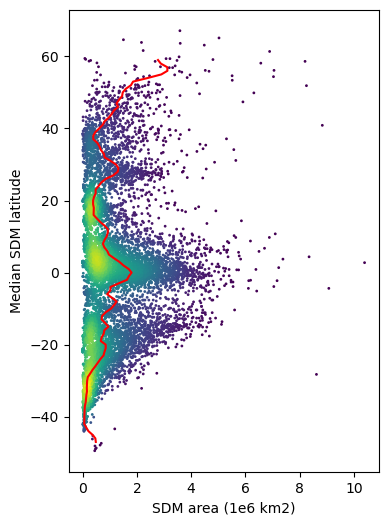

In [4]:
area_latitude_scatterplot(df_global)#filename_to_save='area_latitude_scatterplot_global.png')

In [7]:
df_forest = get_area_lat_elev_df(sdms_forest10_area_lat_elev_drive_filename)
df_forest

,species,area_1981_2010_1e6km2,latitude_1981_2010
0,Abarema_barbouriana,0.919650,3.628381
1,Abarema_brachystachya,0.583012,-20.126729
2,Abarema_cochleata,0.511100,-2.438659
3,Abarema_filamentosa,0.212112,-12.685654
4,Abarema_jupunba,2.873850,2.124942
...,...,...,...
10585,Zygia_latifolia,4.073369,-0.629770
10586,Zygia_longifolia,1.218121,5.378197
10587,Zygia_racemosa,1.946435,0.374169
10588,Zygia_unifoliolata,2.536577,-1.126276


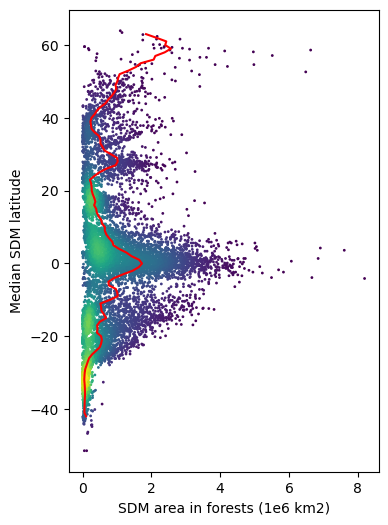

In [8]:
area_latitude_scatterplot(df_forest, xlabel='SDM area in forests (1e6 km2)')#, filename_to_save='area_latitude_scatterplot_forest.png')

In [135]:
df_biome = pd.read_csv(google_drive_path + '/' + sdm_biome_drive_filename + '.csv').drop(['system:index', '.geo'], axis=1)#.set_index('species')
df_biome = pd.melt(df_biome, id_vars=['species'], var_name = 'biome', value_name = 'sdm_frac')
df_biome = df_biome[df_biome['sdm_frac'] > 10]
df_biome

,species,biome,sdm_frac
10,Abies_balsamea,Boreal Forests/Taiga,33
27,Abies_nephrolepis,Boreal Forests/Taiga,16
32,Abies_sachalinensis,Boreal Forests/Taiga,11
33,Abies_sibirica,Boreal Forests/Taiga,54
364,Acer_platanoides,Boreal Forests/Taiga,11
...,...,...,...
157625,Sorbus_meinichii,Tundra,16
157628,Sorbus_rupicola,Tundra,20
157630,Sorbus_sitchensis,Tundra,14
157631,Sorbus_subsimilis,Tundra,26


In [136]:
df_forest_biome = df_biome[df_biome['biome'].str.contains('Forests')]
df_forest_biome

,species,biome,sdm_frac
10,Abies_balsamea,Boreal Forests/Taiga,33
27,Abies_nephrolepis,Boreal Forests/Taiga,16
32,Abies_sachalinensis,Boreal Forests/Taiga,11
33,Abies_sibirica,Boreal Forests/Taiga,54
364,Acer_platanoides,Boreal Forests/Taiga,11
...,...,...,...
148255,Zygia_latifolia,Tropical & Subtropical Moist Broadleaf Forests,78
148256,Zygia_longifolia,Tropical & Subtropical Moist Broadleaf Forests,82
148257,Zygia_racemosa,Tropical & Subtropical Moist Broadleaf Forests,96
148258,Zygia_unifoliolata,Tropical & Subtropical Moist Broadleaf Forests,79


In [137]:
tmp = df_biome.groupby('species').biome.count()
print(10590-tmp.shape[0], 'number of species with no assigned biome')
print(tmp[tmp == 1].shape[0], 'number of species with exactly 1 assigned biome')
print(tmp[tmp > 1].shape[0], 'number of species with more than 1 assigned biome')
print(tmp[tmp > 2].shape[0], 'number of species with more than 2 assigned biomes')

0 number of species with no assigned biome
4431 number of species with exactly 1 assigned biome
6159 number of species with more than 1 assigned biome
1965 number of species with more than 2 assigned biomes


In [138]:
tmp = df_forest_biome.groupby('species').biome.count()
print(10590-tmp.shape[0], 'number of species with no assigned biome')
print(tmp[tmp == 1].shape[0], 'number of species with exactly 1 assigned biome')
print(tmp[tmp > 1].shape[0], 'number of species with more than 1 assigned biome')
print(tmp[tmp > 2].shape[0], 'number of species with more than 2 assigned biomes')

791 number of species with no assigned biome
6694 number of species with exactly 1 assigned biome
3105 number of species with more than 1 assigned biome
439 number of species with more than 2 assigned biomes


In [139]:
df_biome.groupby('biome')['species'].count() # number of species assigned to each biome

biome
Boreal Forests/Taiga                                          80
Deserts & Xeric Shrublands                                   837
Flooded Grasslands & Savannas                                  8
Mangroves                                                      8
Mediterranean Forests, Woodlands & Scrub                     717
Montane Grasslands & Shrublands                              448
Temperate Broadleaf & Mixed Forests                         1985
Temperate Conifer Forests                                    406
Temperate Grasslands, Savannas & Shrublands                  453
Tropical & Subtropical Coniferous Forests                    866
Tropical & Subtropical Dry Broadleaf Forests                1869
Tropical & Subtropical Grasslands, Savannas & Shrublands    3752
Tropical & Subtropical Moist Broadleaf Forests              7422
Tundra                                                        18
Name: species, dtype: int64

In [140]:
df_forest_biome.groupby('biome')['species'].count() # number of species assigned to each biome

biome
Boreal Forests/Taiga                                80
Mediterranean Forests, Woodlands & Scrub           717
Temperate Broadleaf & Mixed Forests               1985
Temperate Conifer Forests                          406
Tropical & Subtropical Coniferous Forests          866
Tropical & Subtropical Dry Broadleaf Forests      1869
Tropical & Subtropical Moist Broadleaf Forests    7422
Name: species, dtype: int64

In [141]:
df = df_global.merge(df_forest, on='species', suffixes=('_global', '_forest')).drop(['latitude_1981_2010_global', 'latitude_1981_2010_forest'], axis=1).rename(
    columns={'area_1981_2010_1e6km2_global': 'global', 'area_1981_2010_1e6km2_forest': 'min_tree_cover_10'}
)
# df['area_decrease'] = (df['area_1981_2010_1e6km2_global'] - df['area_1981_2010_1e6km2_forest']) / df['area_1981_2010_1e6km2_global']
df = df_forest_biome.merge(df, 'left')
# df = df_biome.merge(df, 'left')
df

,species,biome,sdm_frac,global,min_tree_cover_10
0,Abies_balsamea,Boreal Forests/Taiga,33,1.247752,1.213415
1,Abies_nephrolepis,Boreal Forests/Taiga,16,1.618443,1.086879
2,Abies_sachalinensis,Boreal Forests/Taiga,11,0.251949,0.227051
3,Abies_sibirica,Boreal Forests/Taiga,54,3.477092,3.107314
4,Acer_platanoides,Boreal Forests/Taiga,11,1.944535,1.294506
...,...,...,...,...,...
13340,Zygia_latifolia,Tropical & Subtropical Moist Broadleaf Forests,78,4.536488,4.073369
13341,Zygia_longifolia,Tropical & Subtropical Moist Broadleaf Forests,82,1.311062,1.218121
13342,Zygia_racemosa,Tropical & Subtropical Moist Broadleaf Forests,96,1.998093,1.946435
13343,Zygia_unifoliolata,Tropical & Subtropical Moist Broadleaf Forests,79,2.838407,2.536577


In [142]:
df = df.melt(id_vars=['species', 'biome'], value_vars=['global','min_tree_cover_10'], value_name='area_1e6_km2')
df

,species,biome,variable,area_1e6_km2
0,Abies_balsamea,Boreal Forests/Taiga,global,1.247752
1,Abies_nephrolepis,Boreal Forests/Taiga,global,1.618443
2,Abies_sachalinensis,Boreal Forests/Taiga,global,0.251949
3,Abies_sibirica,Boreal Forests/Taiga,global,3.477092
4,Acer_platanoides,Boreal Forests/Taiga,global,1.944535
...,...,...,...,...
26685,Zygia_latifolia,Tropical & Subtropical Moist Broadleaf Forests,min_tree_cover_10,4.073369
26686,Zygia_longifolia,Tropical & Subtropical Moist Broadleaf Forests,min_tree_cover_10,1.218121
26687,Zygia_racemosa,Tropical & Subtropical Moist Broadleaf Forests,min_tree_cover_10,1.946435
26688,Zygia_unifoliolata,Tropical & Subtropical Moist Broadleaf Forests,min_tree_cover_10,2.536577


In [143]:
biome_order = df[df['variable'] == 'global'].groupby('biome').area_1e6_km2.median().sort_values().index.to_list()
biome_order.reverse()
biome_order

['Boreal Forests/Taiga',
 'Tropical & Subtropical Moist Broadleaf Forests',
 'Tropical & Subtropical Dry Broadleaf Forests',
 'Temperate Conifer Forests',
 'Tropical & Subtropical Coniferous Forests',
 'Temperate Broadleaf & Mixed Forests',
 'Mediterranean Forests, Woodlands & Scrub']

AxesSubplot(0.042644,0.541252;0.192112x0.424415) 7
AxesSubplot(0.264367,0.541252;0.192112x0.424415) 7
AxesSubplot(0.48609,0.541252;0.192112x0.424415) 7
AxesSubplot(0.707813,0.541252;0.192112x0.424415) 7
AxesSubplot(0.042644,0.0584184;0.192112x0.424415) 3
AxesSubplot(0.264367,0.0584184;0.192112x0.424415) 3
AxesSubplot(0.48609,0.0584184;0.192112x0.424415) 3


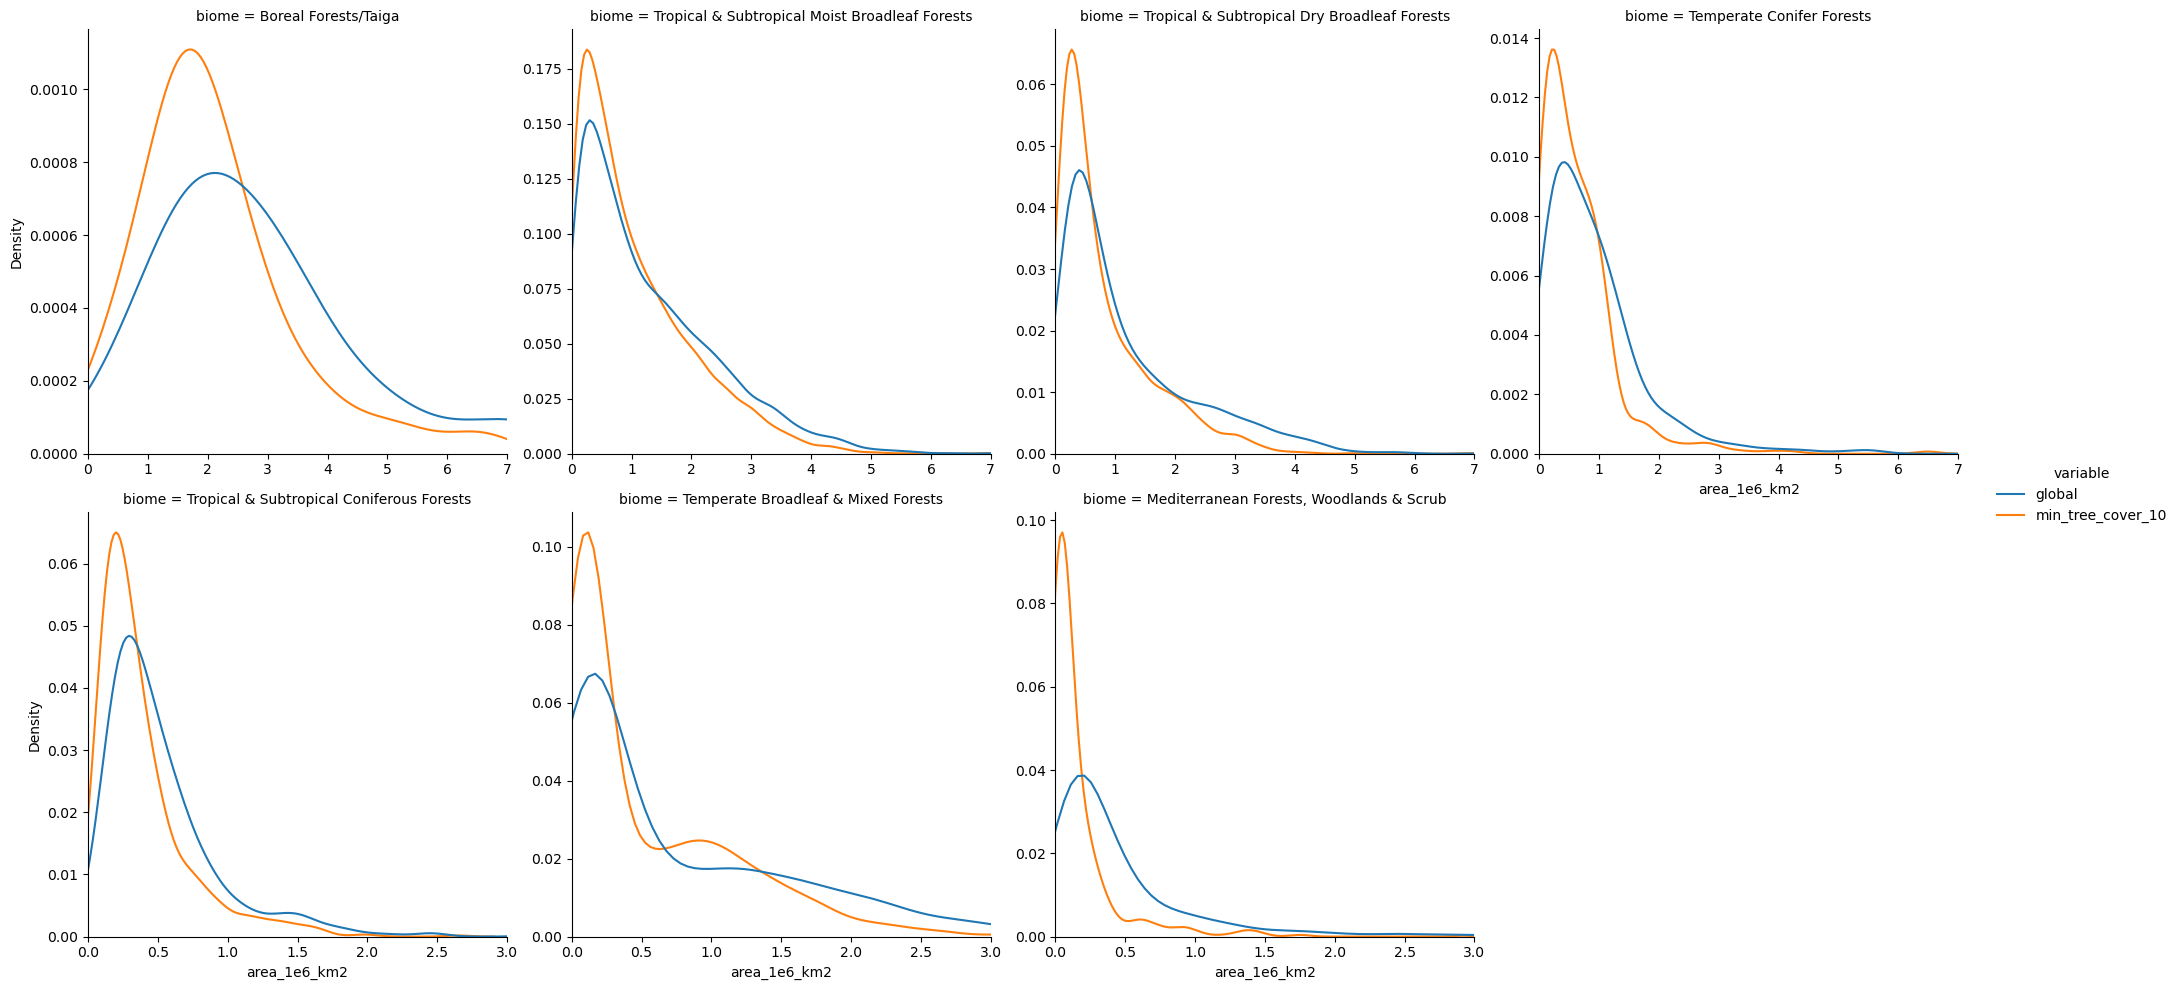

In [144]:
g = sns.displot(df, x = 'area_1e6_km2', hue= 'variable', col = 'biome', kind='kde', facet_kws=dict(sharex=False, sharey=False), col_order=biome_order, col_wrap=4)#kde=True, fill=False, binwidth=0.5, 

xmax_list = [7] * 4 + [3] * 3
for ax, xmax in zip(g.axes, xmax_list):
    print(ax, xmax)
    ax.set_xlim(0, xmax)

In [15]:
biome_names = {
    'Mediterranean Forests, Woodlands & Scrub': 'Mediterranean Forests',
    'Temperate Broadleaf & Mixed Forests': 'Temperate Broadleaf Forests',
    'Tropical & Subtropical Coniferous Forests': 'Tropical Coniferous Forests',
    'Temperate Conifer Forests': 'Temperate Conifer Forests',
    'Tropical & Subtropical Dry Broadleaf Forests': 'Tropical Dry Broadleaf Forests',
    'Tropical & Subtropical Moist Broadleaf Forests': 'Tropical Moist Broadleaf Forests',
    'Boreal Forests/Taiga': 'Boreal Forests',
    'Mangroves': 'Mangroves',
    'Deserts & Xeric Shrublands': 'Deserts',
    'Montane Grasslands & Shrublands': 'Montane Grasslands',
    'Temperate Grasslands, Savannas & Shrublands': 'Temperate Grasslands',
    'Tropical & Subtropical Grasslands, Savannas & Shrublands': 'Tropical Grasslands',
    'Tundra': 'Tundra'
}